              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



Text(95.72222222222221, 0.5, 'Actual')

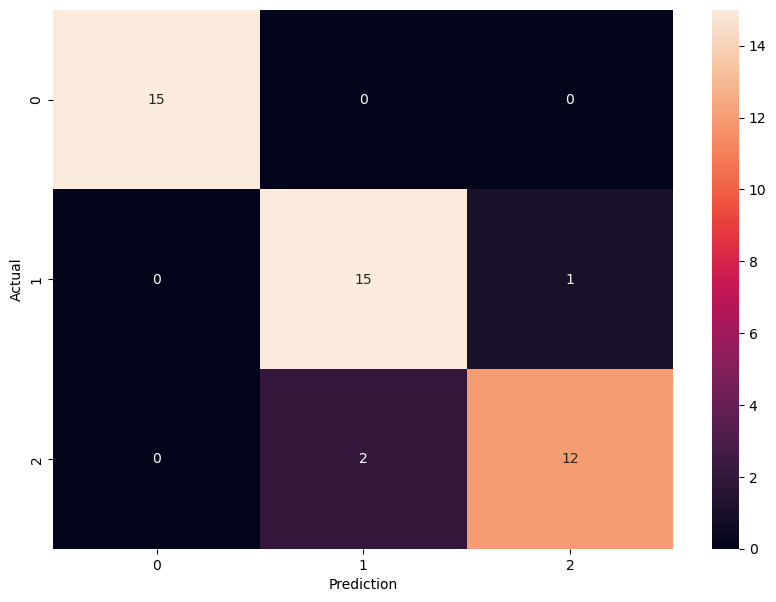

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn

#data Loading 
df = pd.read_csv('iris.csv')

#data cleaning
df.replace([np.Inf, -np.Inf], np.nan, inplace = True)
df.replace(np.nan, 0, inplace = True)

#seperate the data into input and output
X = df
Y = X['variety']
X.drop('variety', axis = 'columns', inplace = True)

#Labeling the output
le = LabelEncoder()
Y = le.fit_transform(Y)

ms = MinMaxScaler()
X = ms.fit_transform(X)

xtrain,xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 5)

model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 10, random_state = 1)

model.fit(xtrain, ytrain)

pred = model.predict(xtest)

cr = classification_report(ytest, pred)
print(cr)

cm = confusion_matrix(ytest, pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [2]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_3 <= 0.25
|   |--- class: 0
|--- feature_3 >  0.25
|   |--- feature_3 <= 0.69
|   |   |--- feature_3 <= 0.56
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.56
|   |   |   |--- class: 1
|   |--- feature_3 >  0.69
|   |   |--- class: 2



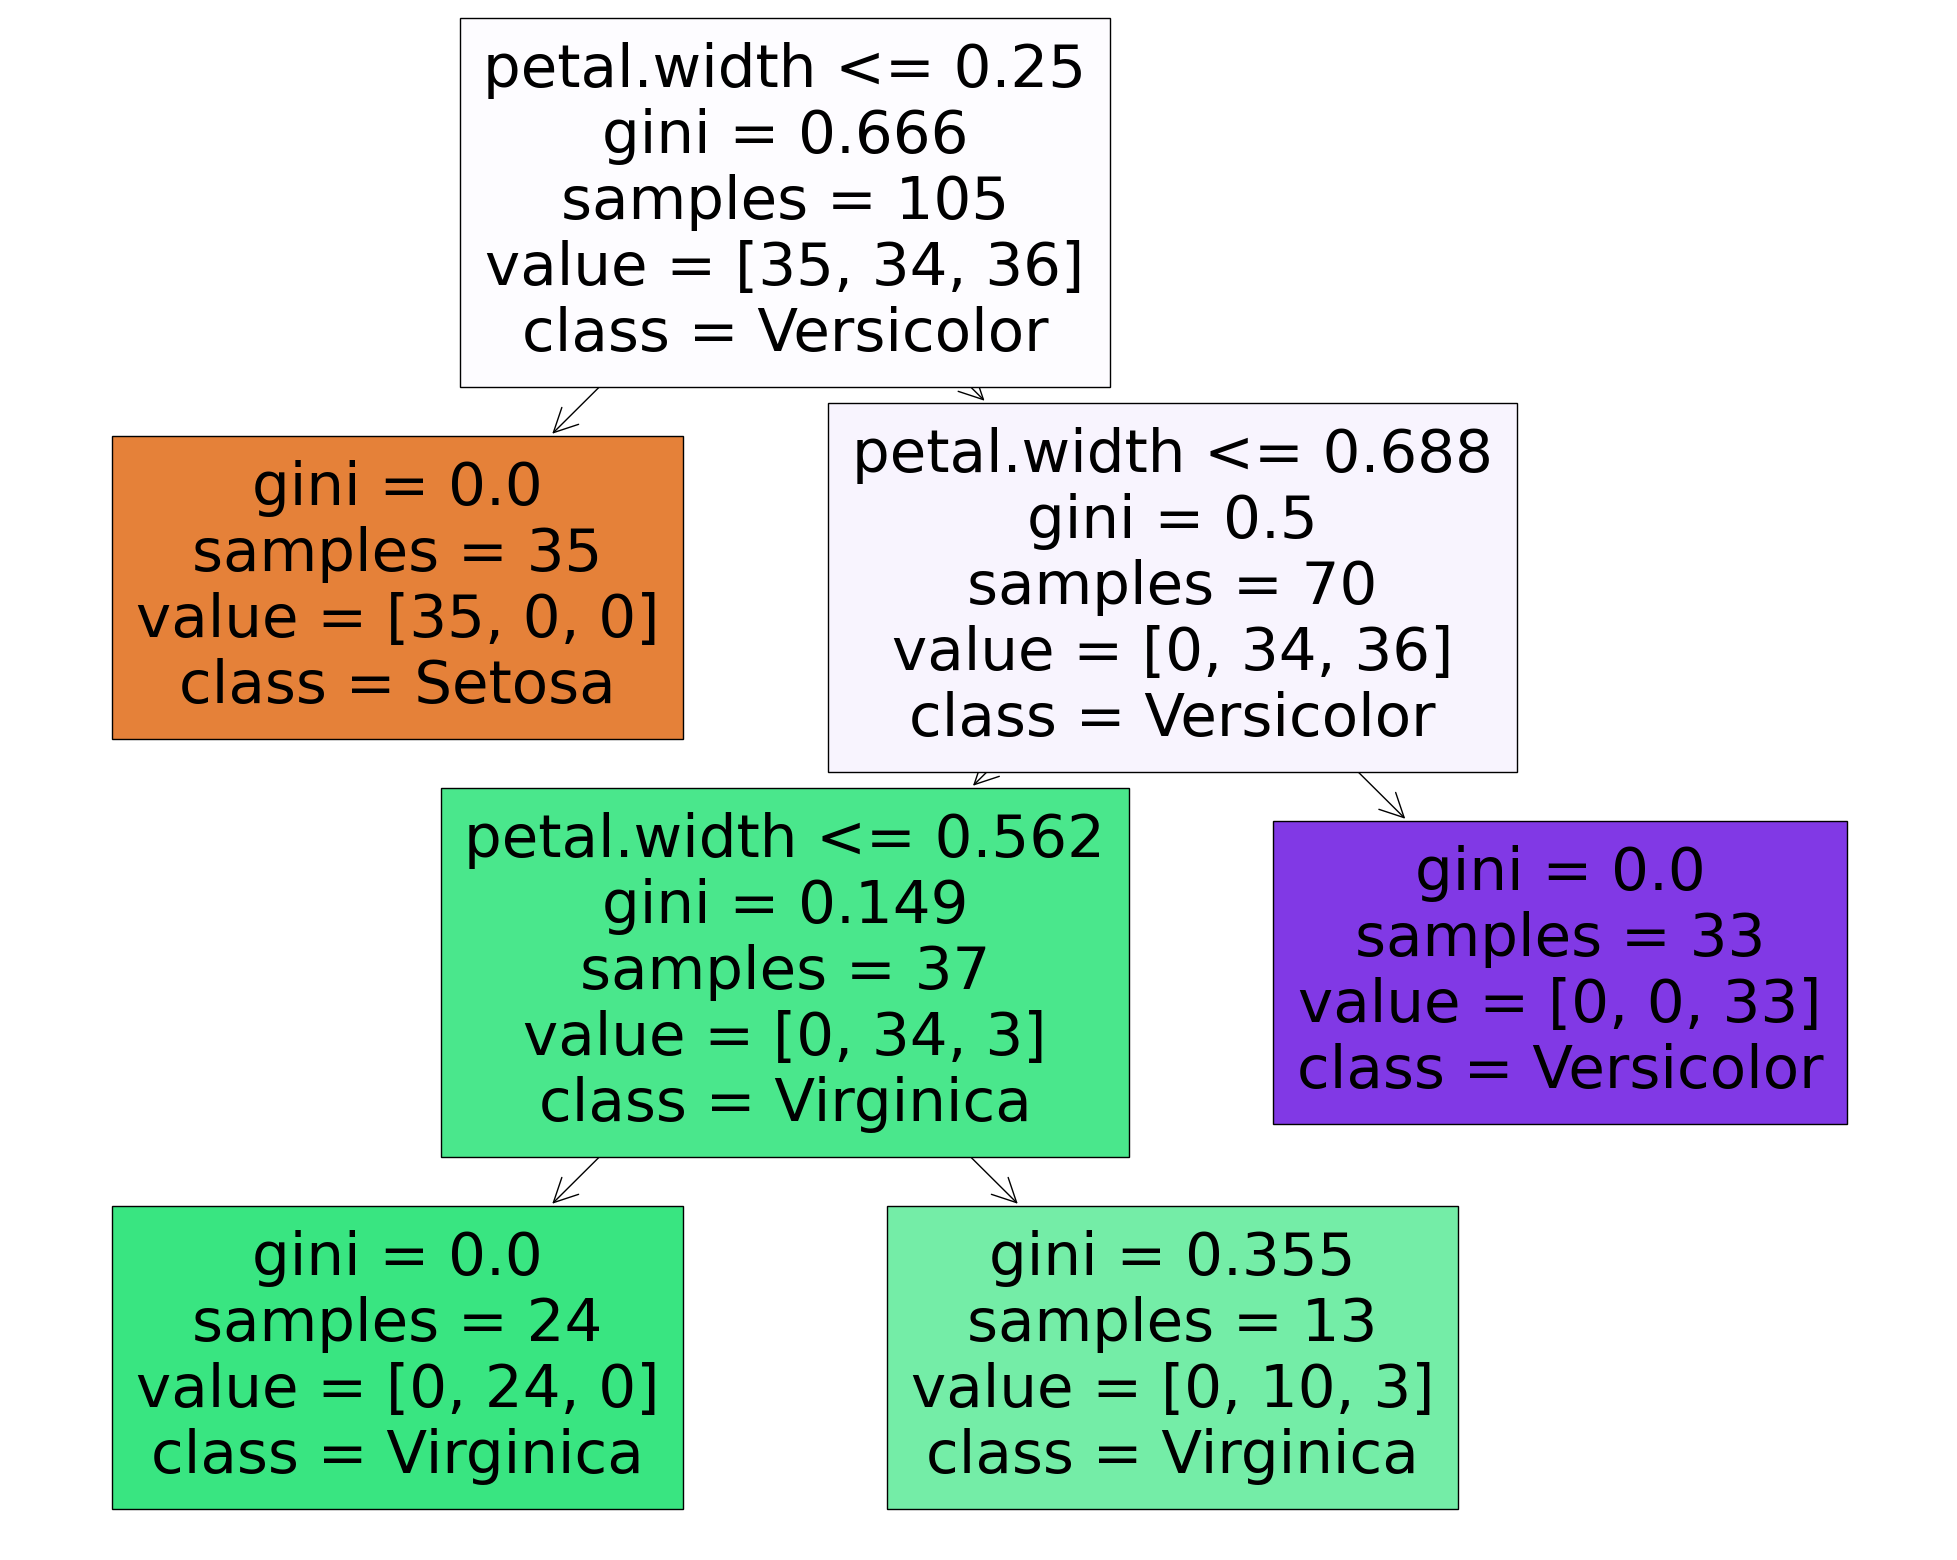

In [9]:
from sklearn import tree
import matplotlib.pyplot as plt 
%matplotlib inline
fn =['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
cn =['Setosa','Virginica', 'Versicolor']
fig=plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,feature_names=fn, class_names=cn, filled=True)